In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import pearsonr

In [3]:
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
%matplotlib inline

## Columns 

    ID :              아이디
    dt_of_fr :        화재발생일시
    fr_yn :           화재발생여부
    bldng_us :        건물용도
    bldng_archtctr :  건물구조
    bldng_cnt:        건물채수
    bldng_ar :        건물건축면적
    ttl_ar :          건물연면적(건물층별합계전체 면적)
    lnd_ar :          토지면적
    dt_of_arthrztn :  건물승인일자
    ttl_grnd_flr :    건물들의 지상 층수의 합
    ttl_dwn_fr :      건물들의 지하 층수의 합
    bldng_us_ :       건물용도분류명
    tmprtr :          온도(c)
    prcpttn :         강수량
    wnd_spd :         풍속
    wnd_drctn :       풍향
    hmdt :            습도
    ele_engry_us_201401 : 전기 에너지 사용량(2014월1월)
    gas_engry_us_201401 : 가스 에너지 사용량(2014월1월)

    lw_13101010 : 복도,계단,출입구의 성능 유지여부(0~5)
    lw_13101110 : 옥상광장의 피난성능 유지여부(0~5)
    lw_13101210 : 방화문, 방화셔터 등의 성능 유지여부(0~5)
    lw_13101211 : 방화구획 적합 여부(0~5)
    lw_13101310 : 경계벽 및 칸막이벽의 변경 등 방화성능 유지여부(0~5)
    lw_13101410 : 배연설비의 성능 유지여부(0~5)
    lw_13111010 : 내화구조의 성능 유지여부(0~5)
    lw_13111110 : 방화벽의 성능 유지여부(0~5)
    lw_13121010 : 외벽의 성능 유지여부(0~5)
    lw_13121011 : 창호의 성능 유지여부(0~5)
    lw_13131010 : 내부마감의 방화성능 유지여부(0~5)
    lw_13131110 : 외부마감의 노후화 및 마감재 탈락 여부(0~5)
    lw_13141010 : 지하층의 소방설비 성능 유지여부(0~5)
    lw_13141011 : 지하층 피난구,피난계단의 성능 유지여부(0~5)

    jmk:          지적상 지목
    rgnl_ar_nm :  용도지역지구명
    rgnl_ar_nm2 : 용도지역지구명2
    lnd_us_sttn_nm : 토지이용상황명
    rd_sd_nm :    도로측면명
    emd_nm :      행정구역명
    hm_cnt :      행정구역 인구
    fr_sttn_dstnc_119 : 안전센터와의 거리
    bldng_ar_prc : 단위 면적당 건물 가격
    fr_wthr_fclt_dstnc : 소방용수시설(소화전 등)과의 거리
    fr_mn_cnt : 관할 소방서 인원
    mlt_us_yn : 다중이용시설 포함여부
    cctv_dstnc : 공공 CCTV와의 최소 거리
    cctv_in_100m : 100m 이내 공공 CCTV
    fr_wthr_fclt_in_100m : 100m 이내 소방용수 시설 수
    tbcco_trl_str_dstnc : 담배 소매점과의 최소 거리
    sft_emrgnc_bll_dstnc : 안전 비상벨과의 최소 거리
    ahsm_dstnc : 자동 심장 충격기와의 최소 거리
    no_tbc_zn_dstnc : 금연구역과의 최소 거리
    bldng_cnt_in_50m : 반경 50M 이내의 건물 수

# 01. 데이터 불러오기

필요 없는 데이터는 csv에서 미리 삭제 했다

In [5]:
df = pd.read_csv('../Data/data_adjsut/train_adjust.csv')

In [6]:
df.head(1)

,id,dt_of_fr,bldng_us,bldng_archtctr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,dt_of_athrztn,ttl_grnd_flr,...,mlt_us_yn,cctv_dstnc,cctv_in_100m,fr_wthr_fclt_in_100m,tbc_rtl_str_dstnc,sft_emrgnc_bll_dstnc,ahsm_dstnc,no_tbc_zn_dstnc,bldng_cnt_in_50m,fr_yn
0,133759,2015-10-03 02:33:46,NaN,NaN,3,112.86,112.86,200.0,NaN,1.0,...,N,129,0,0,809,2453,17664,83,0,N


<br>
<br>
<br>
<br>


# 02. 결측치 처리

---

### 건물은 있는데 건물면적, 건물연면적, 토지면적이 0인 데이터들이 많다. 관찰되지 않은 것일까?
### 토지면적의 null값을 최대한 채워보자
#### 건폐율, 용적률을 생각해야한다.

01. 건축면적과 층수 데이터가 있는데 건물연면적, 토지면적이 둘다 없으면 => 
02. 건축면적 데이터는 있는데, 토지면적이 없다면 => 토지면적 = 건축면적
03. 건물연면적, 토지면적, 건축면적 모두 없는데 건물채수가 있다면 중간값?


* 지상, 지하 층수가 모두 0인 데이터 = 97개 
```
len(df[(df['ttl_grnd_flr'] == 0.0) & (df['ttl_dwn_flr'] == 0.0)])
```

In [7]:
print('건물채수가 0인 데이터: ', len(df[df['bldng_cnt'] <= 0]), '개')
print('건축면적이 0인 데이터: ', len(df[df['bldng_ar'] == 0]), '개')
print('건물연면적 0인 데이터: ', len(df[df['ttl_ar'] == 0]), '개')
print('토지면적이 0인 데이터: ', len(df[df['lnd_ar'] == 0]), '개')        
print('지상 층수 데이터 없는 데이터: ', len(df[df['ttl_grnd_flr'].isnull()]), '개')
print('지하 층수 데이터 없는 데이터: ', len(df[df['ttl_dwn_flr'].isnull()]), '개')
print('지상 층수가 0 : ', len(df[df['ttl_grnd_flr'] == 0]), '개')
print('지하 층수가 0: ', len(df[df['ttl_dwn_flr'] == 0.0]), '개')

건물채수가 0인 데이터:  0 개
건축면적이 0인 데이터:  9660 개
건물연면적 0인 데이터:  8426 개
토지면적이 0인 데이터:  25569 개
지상 층수 데이터 없는 데이터:  10210 개
지하 층수 데이터 없는 데이터:  11005 개
지상 층수가 0 :  103 개
지하 층수가 0:  44579 개


In [8]:
# 토지 용도가 영향을 미칠까봐 더미코딩으로 상관계수 체크해봤는데 거의 없다.
# a = pd.get_dummies(df.jmk)

In [9]:
# info = pd.DataFrame(df[df.columns].isnull().sum()).reset_index()

In [10]:
width_list = ['bldng_cnt', 'bldng_ar', 'ttl_ar', 'lnd_ar', 'ttl_grnd_flr', 'ttl_dwn_flr']
width = df[width_list]

In [11]:
#plt.figure(figsize = (10,10))
#sns.heatmap(data = width.corr(), annot=True, fmt = '.2f', linewidths=.2, cmap='Blues' )
width.corr()

,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,ttl_grnd_flr,ttl_dwn_flr
bldng_cnt,1.000000,0.530414,0.189012,0.443320,0.454254,0.472871
bldng_ar,0.530414,1.000000,0.329309,0.604804,0.350215,0.422405
ttl_ar,0.189012,0.329309,1.000000,0.230771,0.289221,0.257870
lnd_ar,0.443320,0.604804,0.230771,1.000000,0.186991,0.385779
ttl_grnd_flr,0.454254,0.350215,0.289221,0.186991,1.000000,0.698330
ttl_dwn_flr,0.472871,0.422405,0.257870,0.385779,0.698330,1.000000


<br><br><br><br><br><br>


## 토지면적, 연면적, 건축면적 모두 있는 데이터를 나눠서 Train, Test 해보자

In [12]:
# 눌값 없는 데이터의 상관계수 체크
width_drop = width[(width['bldng_ar'] != 0) & (width['ttl_ar'] != 0) &(width['lnd_ar'] != 0)]
width_drop.shape

(32949, 6)

In [13]:
from statsmodels.formula.api import ols

In [14]:
from scipy.stats import pearsonr

<br><br>
01. 데이터셋 나누기

In [15]:
from __future__ import division
from collections import Counter, defaultdict
from functools import partial
# from linear_algebra import shape, get_row, get_column, make_matrix, vector_mean, vector_sum, dot, magnitude, vector_subtract, scalar_multiply
# from statistics import correlation, standard_deviation, mean
#from probability import inverse_normal_cdf
#from gradient_descent import maximize_batch
import math, random, csv
import matplotlib.pyplot as plt
import dateutil.parser

In [16]:
def correlation_matrix(data):
    """(i, j)번째 항목이 i번째 차원과 j번째 차원의 상관관계를 나타내는 num_columns x num_cilums 행렬 반환"""
    
    _, num_colums = shape(data)
    
    def matrix_entry(i, j):
        return correlation(get_column(data, i), get_column(data, i))
    
    return make_matrix(num_colums, num_colums, matrix_entry)

In [17]:
def get_row(A, i):
    return A[i]
    
def get_column(A, j):
    return [A_i[j] for A_i in A]

def make_matrix(num_rows, num_cols, entry_fn):
    """returns a num_rows x num_cols matrix 
    whose (i,j)-th entry is entry_fn(i, j)"""
    return [[entry_fn(i, j) for j in range(num_cols)]
            for i in range(num_rows)]  

def is_diagonal(i, j):
    """1's on the 'diagonal', 0's everywhere else"""
    return 1 if i == j else 0

identity_matrix = make_matrix(5, 5, is_diagonal)

In [18]:
_, num_columns = width_drop.shape
num_columns

6

<function matplotlib.pyplot.show(*args, **kw)>

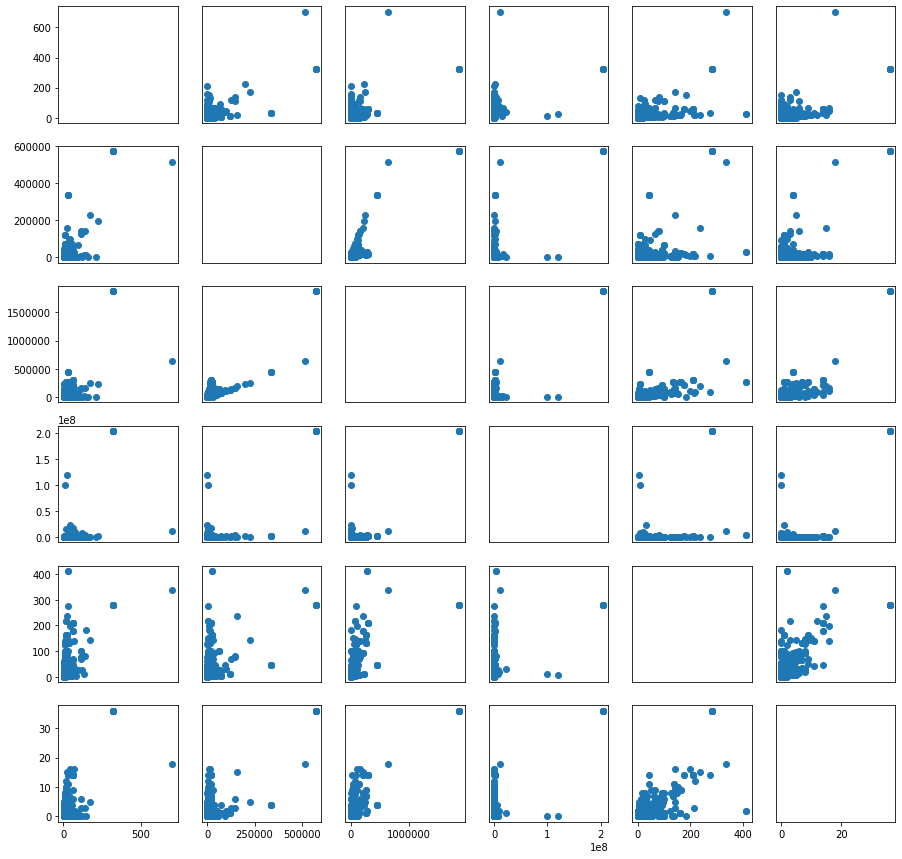

In [19]:
fig, ax = plt.subplots(num_columns, num_columns, figsize=(15,15))

for i in range(num_columns):
    for j in range(num_columns):
        
        # x축은 j번째 열을, y축은 i번째 행을 나타내는 산포도
        if i != j : ax[i][j].scatter(width_drop[width_list[j]], width_drop[width_list[i]])
            
        # 만약 i == j, series라는 제목 출력

        # 왼쪽과 밑에 위치한 차트에만 축 레이블 명시
        if i < num_columns - 1: ax[i][j].xaxis.set_visible(False)
        if j > 0 : ax[i][j].yaxis.set_visible(False)

# 밑에서 가장 오른쪽 그리고 왼쪽에서
# 가장 위에 위치한 차트 안에는 문자열만 있기 때문에
# 축 레이블을 고정
ax[-1][-1].set_xlim(ax[0][-1].get_xlim())
ax[0][0].set_ylim(ax[0][1].get_ylim())

plt.show

In [65]:
res = ols('bldng_ar ~ bldng_cnt + ttl_ar + lnd_ar + ttl_grnd_flr + ttl_dwn_flr', width_drop).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 ttl_ar   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                 6.558e+04
Date:                Tue, 29 Oct 2019   Prob (F-statistic):               0.00
Time:                        15:57:17   Log-Likelihood:            -3.1910e+05
No. Observations:               30253   AIC:                         6.382e+05
Df Residuals:                   30248   BIC:                         6.383e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -2465.1887     59.538    -41.406      0.000   -2581.885   -2348.493
bldng_cnt      466.2571     10.364     44.990      0.000     445.944     486.570
lnd_ar           0.0057   2.57e-05    221.443      0.000       0.006       0.006
ttl_grnd_flr   619.1588      9.410     65.795      0.000     600.714     637.604
ttl_dwn_flr   7560.5373    129.048     58.587      0.000    7307.598    7813.477
==============================================================================
Omnibus:                    54928.096   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       4913154788.218
Skew:                         -11.797   Prob(JB):                         0.00
Kurtosis:                    1977.107   Cond. No.                     7.35e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.35e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
res = ols('bldng_ar ~ bldng_cnt + ttl_ar + lnd_ar + ttl_grnd_flr + ttl_dwn_flr', width_drop).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               bldng_ar   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                 6.916e+04
Date:                Tue, 29 Oct 2019   Prob (F-statistic):               0.00
Time:                        15:53:14   Log-Likelihood:            -3.1650e+05
No. Observations:               32949   AIC:                         6.330e+05
Df Residuals:                   32945   BIC:                         6.330e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -671.8544     22.360    -30.047      0.000    -715.680    -628.029
bldng_cnt    285.0250      3.724     76.536      0.000     277.726     292.324
ttl_ar         0.3112      0.002    181.855      0.000       0.308       0.315
lnd_ar        -0.0005   1.45e-05    -30.992      0.000      -0.000      -0.000
==============================================================================
Omnibus:                    68931.781   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1931592769.967
Skew:                          17.174   Prob(JB):                         0.00
Kurtosis:                    1188.660   Cond. No.                     3.28e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.28e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
# a['b_l'] = width['bldng_ar'].isnull()
# plt.figure(figsize = (15,15))
# sns.heatmap(data = a.corr(), annot=True, fmt = '.2f', linewidths=.2, cmap='Blues' )

In [22]:
#plt.figure(figsize = (10,10))
#sns.heatmap(data = width_drop.corr(), annot=True, fmt = '.2f', linewidths=.2, cmap='Blues' )
width_drop.corr()

,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,ttl_grnd_flr,ttl_dwn_flr
bldng_cnt,1.000000,0.745936,0.689632,0.584136,0.594058,0.611975
bldng_ar,0.745936,1.000000,0.912741,0.769379,0.557667,0.692329
ttl_ar,0.689632,0.912741,1.000000,0.881332,0.667423,0.804471
lnd_ar,0.584136,0.769379,0.881332,1.000000,0.440128,0.665198
ttl_grnd_flr,0.594058,0.557667,0.667423,0.440128,1.000000,0.735390
ttl_dwn_flr,0.611975,0.692329,0.804471,0.665198,0.735390,1.000000


In [2]:
width_Train = width_drop.sample(20000)
width_Test = 

SyntaxError: invalid syntax (<ipython-input-2-7daa03699ca7>, line 2)

<br><br><br>
#### 02. 결측치 상황을 나눠 예상 값 계산하기

<br>

01. 빌딩카운트만 있음 <br>
    따로 빼서 살펴보거나 제거

02. 빌딩 cnt, ar 있음 <br>
    ttl_ar, lnd_ar

03. b_ar, ttl_ar <br>
    -> lnd_ar

04. ttl_ar
    -> b_ar, lnd_ar <br>

05. b_ar, lnd_ar <br>
    -> ttl_ar

06. lnd_ar <br>
    -> b_ar, ttl_ar

    

In [ ]:
#01 ttl_ar = x1 * b_cnt + x2 * b_ar + 계수
#   



In [24]:
# (토지면적, 연면적) null아닌 값은 그냥 복사 --> 하면 안됨!!!
#df['lnd_ar2'] = df['lnd_ar']
#df['ttl_ar2'] = df['ttl_ar']

# 총 층수
width['tt_flr'] = width['ttl_grnd_flr'] + width['ttl_dwn_flr']

In [20]:
tDB.sample(10)

,id,dt_of_fr,bldng_us,bldng_archtctr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,dt_of_athrztn,ttl_grnd_flr,...,fr_wthr_fclt_in_100m,tbc_rtl_str_dstnc,sft_emrgnc_bll_dstnc,ahsm_dstnc,no_tbc_zn_dstnc,bldng_cnt_in_50m,fr_yn,lnd_ar2,ttl_ar2,tt_flr
28521,78083,2017-02-05 06:31:50,단독주택,벽돌구조,1,131.91,131.910,660.0,2.0061e+07,1.0,...,0,1666,7131,1019,518,8,N,660.0,131.910,1.0
53275,133090,2016-06-19 22:13:00,제2종근린생활시설,철근콘크리트구조,1,183.75,1005.193,265.0,1.99405e+07,5.0,...,0,102,11744,82,457,24,Y,265.0,1005.193,6.0
42749,128148,2018-07-23 04:31:40,NaN,NaN,10,76.03,76.030,426.0,NaN,1.0,...,0,9864,33453,14584,105,1,N,426.0,76.030,1.0
46697,107485,2017-02-20 20:16:04,NaN,NaN,4,0.00,0.000,0.0,NaN,NaN,...,0,9778,78459,475,38,22,N,0.0,0.000,NaN
27294,118805,2018-03-11 11:48:49,단독주택,철근콘크리트구조,1,123.51,376.710,248.2,2.0071e+07,2.0,...,0,326,9266,176,214,0,N,248.2,376.710,3.0
53864,102677,2014-05-02 19:41:20,단독주택,철근콘크리트구조,1,109.65,107.880,550.0,2.01409e+07,1.0,...,0,4523,17944,5144,6036,0,N,550.0,107.880,1.0
25284,76065,2016-09-10 10:19:00,NaN,NaN,2,0.00,0.000,0.0,NaN,NaN,...,0,17382,52421,11298,1628,0,N,0.0,0.000,NaN
20669,100662,2014-10-09 11:47:24,단독주택,일반목구조,3,148.76,148.760,0.0,1934,2.0,...,0,2028,34136,2272,8799,0,N,0.0,148.760,2.0
9076,72896,2016-01-04 17:35:00,제2종근린생활시설,철근콘크리트구조,2,489.68,1469.040,742.0,2.0011e+07,6.0,...,1,36,326,5608,261,12,Y,742.0,1469.040,6.0
2377,97734,2016-08-11 01:12:33,단독주택,일반목구조,1,53.51,53.510,0.0,1920,1.0,...,0,6857,31760,32952,5413,0,N,0.0,53.510,1.0


In [83]:
for x in tDB[tDB['lnd_ar2'] == 0].index:
    tDB['lnd_ar2'][x] = tDB['bldng_ar'][x]
print('토지면적이 0인 데이터: ', len(tDB[tDB['lnd_ar2'] == 0.0]), '개')


for x in tDB[tDB['ttl_ar2'] == 0].index:
    tDB['ttl_ar2'][x] = tDB['bldng_ar'][x] * tDB['tt_flr'][x]
    
print('연면적이 0인 데이터: ', len(tDB[tDB['ttl_ar2'] == 0.0]), '개')

토지면적이 0인 데이터:  8992 개
연면적이 0인 데이터:  803 개


In [84]:
a = tDB[['bldng_cnt','bldng_ar', 'ttl_ar', 'lnd_ar', 'ttl_grnd_flr', 'ttl_dwn_flr']]
a.iloc[:,:].corr()

,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,ttl_grnd_flr,ttl_dwn_flr
bldng_cnt,1.000000,0.530414,0.189012,0.443320,0.454254,0.472871
bldng_ar,0.530414,1.000000,0.329309,0.604804,0.350215,0.422405
ttl_ar,0.189012,0.329309,1.000000,0.230771,0.289221,0.257870
lnd_ar,0.443320,0.604804,0.230771,1.000000,0.186991,0.385779
ttl_grnd_flr,0.454254,0.350215,0.289221,0.186991,1.000000,0.698330
ttl_dwn_flr,0.472871,0.422405,0.257870,0.385779,0.698330,1.000000


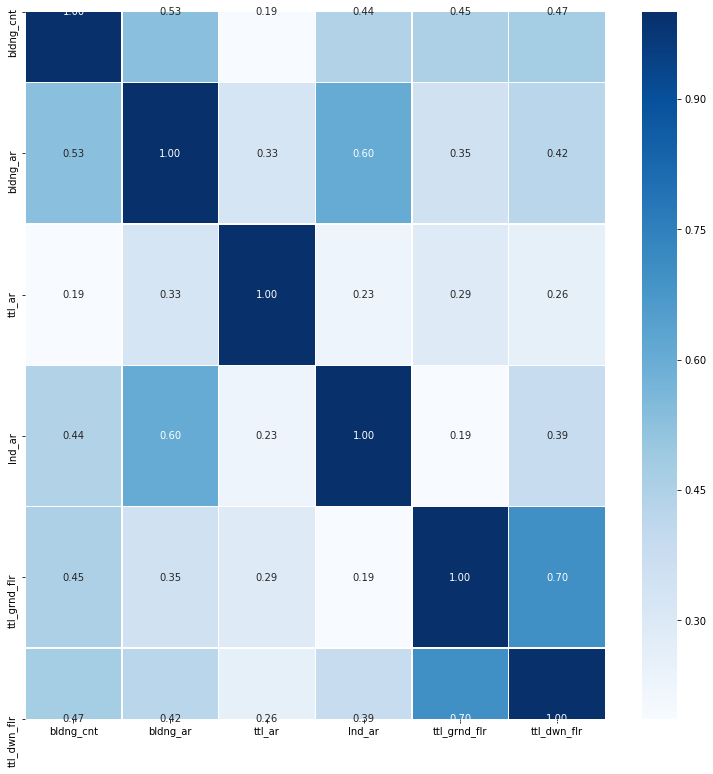

In [85]:
plt.figure(figsize=(13,13))
sns.heatmap(data = a.iloc[:,:].corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')



### 2. 차원 축소 - PCA 사용

- 건물 수 / 건축면적 => 건물 밀집도

(건물 수, 건축 면적 안쓰기)

In [95]:
from sklearn.preprocessing import StandardScaler

### 표준화

In [96]:
scale = StandardScaler()

In [98]:
x = scale.fit_transform(tDB.iloc[:, :])

ValueError: could not convert string to float: '2015-10-03 02:33:46'

In [93]:
tDB['dencity'] = tDB['bldng_ar'] / tDB['bldng_cnt']
tDB['dencity']

0         37.620000
1        240.606667
2         11.765000
3         85.725000
4          0.000000
            ...    
59194    167.670000
59195     28.690000
59196     63.160000
59197      0.000000
59198     45.890000
Name: dencity, Length: 59199, dtype: float64

In [130]:
voidplace = tDB[(tDB['bldng_ar'] == 0) & (tDB['ttl_ar'] == 0) & (tDB['lnd_ar'] ==0)]
voidplace[['id', 'bldng_archtctr', 'bldng_ar', 'ttl_grnd_flr', 'ttl_dwn_flr']]
voidplace

1386836

## 02. 카테고리컬 데이터 전처리

In [86]:
df = tDB[['id', 'dt_of_fr', 'bldng_cnt', 'bldng_ar', 'ttl_ar', 'lnd_ar'
           , 'jmk', 'fr_sttn_dstnc', 'fr_wthr_fclt_dstnc'
           , 'mlt_us_yn', 'cctv_dstnc', 'cctv_in_100m'
           , 'fr_wthr_fclt_in_100m', 'tbc_rtl_str_dstnc', 'sft_emrgnc_bll_dstnc'
           , 'ahsm_dstnc', 'no_tbc_zn_dstnc', 'bldng_cnt_in_50m', 'fr_yn']]

### a. 날짜 쪼개기

In [89]:
df['year'] = pd.to_datetime(df['dt_of_fr']).dt.year
df['month'] = pd.to_datetime(df['dt_of_fr']).dt.month
df['day'] = pd.to_datetime(df['dt_of_fr']).dt.day
df['hour'] = pd.to_datetime(df['dt_of_fr']).dt.hour
df['minute'] = pd.to_datetime(df['dt_of_fr']).dt.minute
df['second'] = pd.to_datetime(df['dt_of_fr']).dt.second
df['dayofweek'] = pd.to_datetime(df['dt_of_fr']).dt.day_name()
df['year-month'] = df['dt_of_fr'].apply(lambda x: x[:7])

# df.drop(['dt_of_fr'], axis= 1, inplace=True)
#df[['year-month', 'year', 'month', 'day', 'dayofweek', 'hour', 'minute', 'second']].sample(10)

,year-month,year,month,day,dayofweek,hour,minute,second
7998,2014-04,2014,4,24,Thursday,10,25,0
30162,2018-07,2018,7,4,Wednesday,18,22,28
12678,2016-06,2016,6,7,Tuesday,13,10,35
10177,2018-03,2018,3,21,Wednesday,16,57,26
53393,2017-03,2017,3,14,Tuesday,12,33,0
43917,2014-04,2014,4,7,Monday,2,48,47
7928,2015-08,2015,8,24,Monday,5,56,10
30576,2014-03,2014,3,1,Saturday,7,46,51
36094,2014-12,2014,12,20,Saturday,20,26,0
11873,2016-02,2016,2,12,Friday,19,17,0


### b. 빌딩 용도 처리

In [59]:
print('카테고리:   ', tDB['bldng_us'].unique())
print('len:   ', len(tDB['bldng_us'].unique()))

카테고리:    [nan '업무시설' '단독주택' '위험물저장및처리시설' '공동주택' '제1종근린생활시설' '공장' '제2종근린생활시설'
 '노유자시설' '운동시설' '동.식물 관련시설' '창고시설' '의료시설' '위락시설' '자동차관련시설' '종교시설' '근린생활시설'
 '분뇨.쓰레기처리시설' '숙박시설' '교육연구시설' '발전시설' '관광휴게시설' '판매시설' '수련시설' '문화및집회시설'
 '묘지관련시설' '방송통신시설' '장례식장' '운수시설' '교정및군사시설' '교육연구및복지시설' '파출소' '판매및영업시설'
 '시장' '공공용시설']
len:    35


### c. 빌딩 자재

In [60]:
print('카테고리:    ', tDB['bldng_archtctr'].unique())
print('len:   ', len(tDB['bldng_archtctr'].unique()))

카테고리:     [nan '철근콘크리트구조' '블록구조' '벽돌구조' '경량철골구조' '일반목구조' '일반철골구조' '기타구조' '강파이프구조'
 '조적구조' '석구조' '기타조적구조' '통나무구조' '철골콘크리트구조' '철골철근콘크리트구조' '기타강구조'
 '프리케스트콘크리트구조' '목구조' '기타콘크리트구조']
len:    19


### c. 화재 발생 여부 (y/n)

In [90]:
df['fr_yn'].unique()

array(['N', 'Y'], dtype=object)

## 문자형 데이터 -> digit화

In [91]:
df['fr_yn2'] = df['fr_yn'].replace({'N':0,'Y':1})
yfire = df[df['fr_yn'] == 'Y']
nfire = df[df['fr_yn'] == 'N']


In [92]:
pd.Series(sorted(df['jmk'].unique()))

0     공
1     과
2     구
3     답
4     대
5     도
6     목
7     묘
8     사
9     수
10    양
11    원
12    유
13    임
14    잡
15    장
16    전
17    제
18    종
19    주
20    차
21    창
22    천
23    철
24    체
25    학
dtype: object

In [93]:
df.iloc[:,1:].corr()

,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,fr_sttn_dstnc,fr_wthr_fclt_dstnc,cctv_dstnc,cctv_in_100m,fr_wthr_fclt_in_100m,tbc_rtl_str_dstnc,...,ahsm_dstnc,no_tbc_zn_dstnc,bldng_cnt_in_50m,year,month,day,hour,minute,second,fr_yn2
bldng_cnt,1.000000,0.530414,0.189012,0.443320,0.009314,-0.014234,0.010925,-0.066528,-0.051694,0.019226,...,-0.003087,0.029456,-0.048917,0.002270,0.000446,-0.004154,0.008258,-0.000111,-0.025870,0.056176
bldng_ar,0.530414,1.000000,0.329309,0.604804,-0.029663,-0.005821,-0.011676,-0.014838,-0.008633,-0.031150,...,0.034578,-0.014944,-0.009598,0.001947,0.003814,-0.000062,0.011439,-0.003473,-0.042919,0.085169
ttl_ar,0.189012,0.329309,1.000000,0.230771,-0.020504,-0.011536,-0.011232,-0.006543,0.004590,-0.022649,...,0.026339,-0.015214,-0.003122,0.003046,0.002909,-0.000263,0.001096,-0.001693,-0.031276,0.059955
lnd_ar,0.443320,0.604804,0.230771,1.000000,-0.004147,-0.005827,-0.000384,-0.003896,-0.002267,-0.007256,...,-0.003103,-0.004577,0.000704,0.006845,-0.001965,0.001709,0.005195,0.001424,-0.012330,0.025034
fr_sttn_dstnc,0.009314,-0.029663,-0.020504,-0.004147,1.000000,0.070991,0.363127,-0.237448,-0.220333,0.588492,...,0.057742,0.178793,-0.284051,0.003074,-0.001068,-0.000498,-0.007309,0.000167,0.037959,-0.070687
fr_wthr_fclt_dstnc,-0.014234,-0.005821,-0.011536,-0.005827,0.070991,1.000000,0.098490,0.076436,-0.285666,0.137121,...,-0.272471,0.001452,0.033513,0.001422,-0.003456,0.004841,-0.009888,-0.003842,0.084503,-0.165280
cctv_dstnc,0.010925,-0.011676,-0.011232,-0.000384,0.363127,0.098490,1.000000,-0.188067,-0.155715,0.237320,...,-0.114840,0.101578,-0.148197,-0.003059,-0.004526,0.005605,-0.003888,0.001391,0.011745,-0.029258
cctv_in_100m,-0.066528,-0.014838,-0.006543,-0.003896,-0.237448,0.076436,-0.188067,1.000000,0.246822,-0.229323,...,0.001951,-0.166905,0.212812,0.007794,0.005606,-0.004610,-0.001072,-0.009495,-0.014431,0.027540
fr_wthr_fclt_in_100m,-0.051694,-0.008633,0.004590,-0.002267,-0.220333,-0.285666,-0.155715,0.246822,1.000000,-0.227256,...,0.072657,-0.108722,0.239189,-0.002232,0.003773,-0.003304,0.010691,-0.004237,-0.043929,0.096476
tbc_rtl_str_dstnc,0.019226,-0.031150,-0.022649,-0.007256,0.588492,0.137121,0.237320,-0.229323,-0.227256,1.000000,...,-0.017208,0.210352,-0.267521,-0.001057,-0.006470,0.006537,-0.008268,0.004900,0.037891,-0.065983


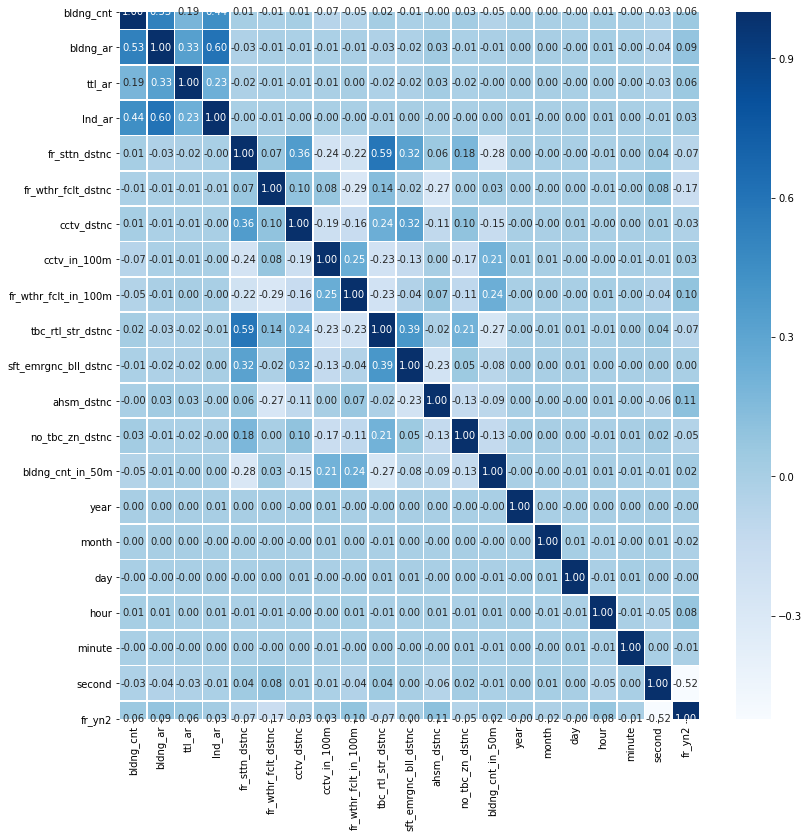

In [94]:
plt.figure(figsize=(13,13))
sns.heatmap(data = df.iloc[:,1:].corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

### ** 건물채 수, 건물건축면적, 건물연면적, 토지면적이 서로 큰 관계성을 가지고 있으므로 차원 축소를 시도해 본다.

In [95]:
plt.figure(figsize=(13,13))
sns.heatmap(data = .iloc[:,1:].corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

NameError: name 'df_y' is not defined

<Figure size 936x936 with 0 Axes>

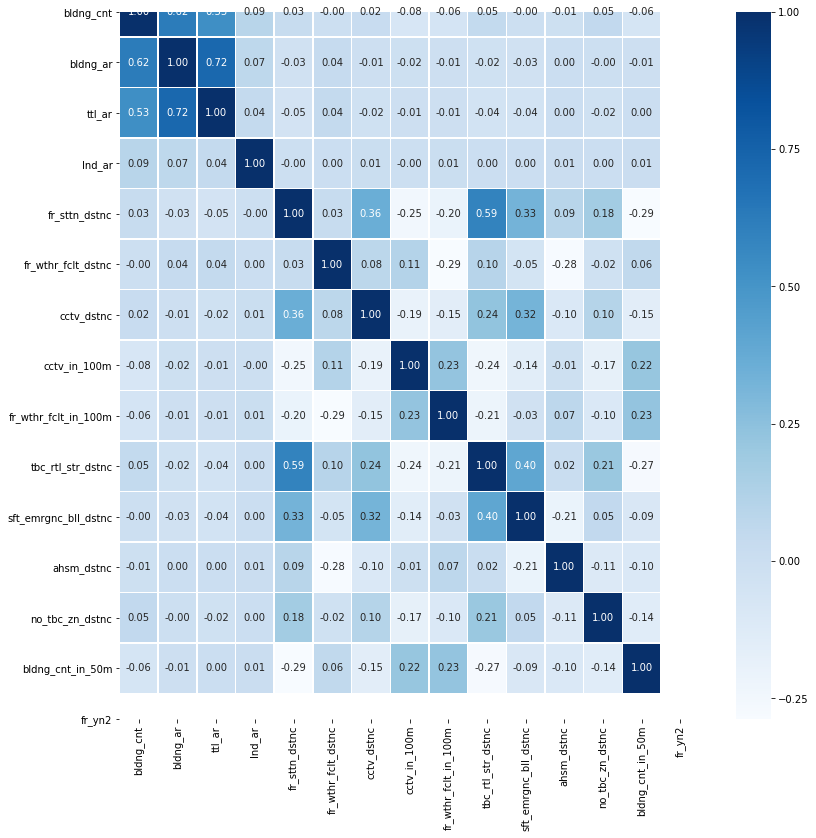

In [85]:
plt.figure(figsize=(13,13))
sns.heatmap(data = tDB_n.iloc[:,1:].corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

# Yearly 비교


In [7]:
y_count = tDB.groupby('year').count().reset_index()[['year', 'id']]
y_count = y_count.rename(columns = {'id':'count'})
y_count

,year,count
0,2014,11724
1,2015,12036
2,2016,11885
3,2017,11801
4,2018,11753


In [8]:
%matplotlib inline

(11000, 12500)

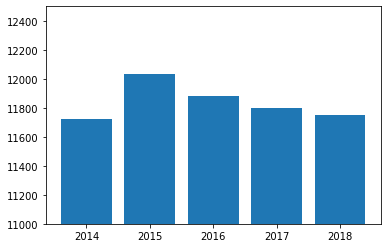

In [9]:
plt.bar(x = 'year', height='count', data = y_count)
plt.ylim(11000, 12500)


---

# Monthly 비교
> 계절별 비교로 나눠 할 수 있겠음

In [10]:
m_count = tDB.groupby('month').count().reset_index()[['month', 'id']]
m_count = m_count.rename(columns = {'id':'count'})
m_count

,month,count
0,01,5080
1,02,5056
2,03,5082
3,04,4993
4,05,4902
5,06,4788
6,07,4781
7,08,4802
8,09,4711
9,10,4978


(4400, 5500)

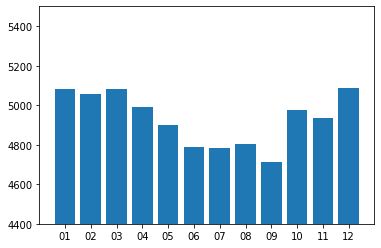

In [11]:
plt.bar(x = 'month', height='count', data = m_count)
plt.ylim(4400, 5500)

---
# 날짜별 비교
 
 > 요일별 비교가 더 나을 듯

In [12]:
d_count = tDB.groupby('date').count().reset_index()[['date', 'id']]
d_count = d_count.rename(columns = {'id':'count'})

<BarContainer object of 31 artists>

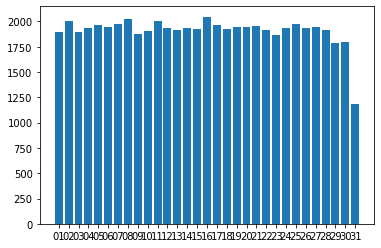

In [13]:
plt.bar(x = 'date', height='count', data = d_count)

---
# 시간대별 비교

In [25]:
a = tDB['time'].reset_index()
a['time'] = a['time'].apply(lambda x : x[:2])

0        02
1        17
2        12
3        02
4        16
         ..
59194    10
59195    17
59196    08
59197    03
59198    21
Name: time, Length: 59199, dtype: object

In [27]:
time_line = sorted(a['time'])

(2000, 2750)

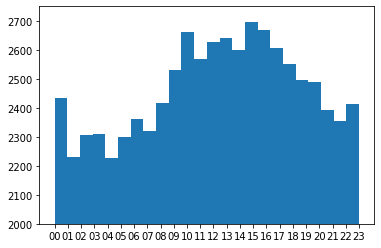

In [31]:
plt.hist(time_line, bins = 24)
plt.ylim(2000, 2750)